In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict
from sklearn.feature_selection import VarianceThreshold
import collections
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report





In [18]:
# import required libraries 
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import time
import glob
import os 
import re

from numpy import array

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import completeness_score, homogeneity_score, v_measure_score

from sklearn.model_selection import train_test_split


%matplotlib inline

In [19]:
#path = r"E:\Juypter-files\dataset1_LOCAL_DATA"

# prepare the document 

In [20]:
'''
csv_files = {
 'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv': 'gurd_infiltration_28-02-2018.csv',
 'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv': 'gurd_bot_02-03-2018.csv',
 'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv': 'gurd_bruteforce-web-xss_sql-injection_22-02-2018.csv',
 'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv': 'gurd_dos-slowhttp-hulk_16-02-2018.csv',
}

column_name_regex = re.compile(r"\W", re.IGNORECASE)
processed_dir = 'processed'
processed_path = os.path.join(path, processed_dir)

def remove_headers(f):    
    return f[~f['Dst Port'].str.contains('Dst Port', na=False)]

def replace_infinity(f):
    return f.replace('Infinity', 'inf', inplace=True)

# go itrate over all comulmns in the csves and make them start with lower case char
def remove_non_word_chars_from_column_names(f):
    return [column_name_regex.sub('_', c.lower()) for c in df.columns]
    
if not os.path.exists(processed_path):
    os.mkdir(processed_path)    
    
for f, out in csv_files.items():
    file_path = os.path.join(path, f)
    output_path = os.path.join(path, processed_dir, out)
    
    df = pd.read_csv(file_path, dtype=str).drop(columns=['Flow ID', 'Src IP', 'Dst IP', 'Src Port'], errors='ignore')
    df = remove_headers(df)
    replace_infinity(df)
    df.columns = remove_non_word_chars_from_column_names(df)
    df.to_csv(output_path, index=False)
    '''

'\ncsv_files = {\n \'Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv\': \'gurd_infiltration_28-02-2018.csv\',\n \'Friday-02-03-2018_TrafficForML_CICFlowMeter.csv\': \'gurd_bot_02-03-2018.csv\',\n \'Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv\': \'gurd_bruteforce-web-xss_sql-injection_22-02-2018.csv\',\n \'Friday-16-02-2018_TrafficForML_CICFlowMeter.csv\': \'gurd_dos-slowhttp-hulk_16-02-2018.csv\',\n}\n\ncolumn_name_regex = re.compile(r"\\W", re.IGNORECASE)\nprocessed_dir = \'processed\'\nprocessed_path = os.path.join(path, processed_dir)\n\ndef remove_headers(f):    \n    return f[~f[\'Dst Port\'].str.contains(\'Dst Port\', na=False)]\n\ndef replace_infinity(f):\n    return f.replace(\'Infinity\', \'inf\', inplace=True)\n\n# go itrate over all comulmns in the csves and make them start with lower case char\ndef remove_non_word_chars_from_column_names(f):\n    return [column_name_regex.sub(\'_\', c.lower()) for c in df.columns]\n    \nif not os.path.exists(processed_path):\n    

In [21]:
path1 = r"E:\Juypter-files\dataset1_LOCAL_DATA\csv_files"

In [22]:
types = {
    'dst_port': 'uint32',
    'protocol': 'uint8',
    'timestamp': 'object',
    'flow_duration': 'int64',
    'tot_fwd_pkts': 'uint32',
    'tot_bwd_pkts': 'uint32',
    'totlen_fwd_pkts': 'uint32',
    'totlen_bwd_pkts': 'uint32',
    'fwd_pkt_len_max': 'uint16',
    'fwd_pkt_len_min': 'uint16',
    'fwd_pkt_len_mean': 'float32',
    'fwd_pkt_len_std': 'float32',
    'bwd_pkt_len_max': 'uint16',
    'bwd_pkt_len_min': 'uint16',
    'bwd_pkt_len_mean': 'float32',
    'bwd_pkt_len_std': 'float32',
    'flow_byts_s': 'float64',
    'flow_pkts_s': 'float64',
    'flow_iat_mean': 'float32',
    'flow_iat_std': 'float32',
    'flow_iat_max': 'int64',
    'flow_iat_min': 'int64',
    'fwd_iat_tot': 'int64',
    'fwd_iat_mean': 'float32',
    'fwd_iat_std': 'float32',
    'fwd_iat_max': 'int64',
    'fwd_iat_min': 'int64',
    'bwd_iat_tot': 'uint32',
    'bwd_iat_mean': 'float32',
    'bwd_iat_std': 'float32',
    'bwd_iat_max': 'uint32',
    'bwd_iat_min': 'uint32',
    'fwd_psh_flags': 'uint8',
    'bwd_psh_flags': 'uint8',
    'fwd_urg_flags': 'uint8',
    'bwd_urg_flags': 'uint8',
    'fwd_header_len': 'uint32',
    'bwd_header_len': 'uint32',
    'fwd_pkts_s': 'float32',
    'bwd_pkts_s': 'float32',
    'pkt_len_min': 'uint16',
    'pkt_len_max': 'uint16',
    'pkt_len_mean': 'float32',
    'pkt_len_std': 'float32',
    'pkt_len_var': 'float32',
    'fin_flag_cnt': 'uint8',
    'syn_flag_cnt': 'uint8',
    'rst_flag_cnt': 'uint8',
    'psh_flag_cnt': 'uint8',
    'ack_flag_cnt': 'uint8',
    'urg_flag_cnt': 'uint8',
    'cwe_flag_count': 'uint8',
    'ece_flag_cnt': 'uint8',
    'down_up_ratio': 'uint16',
    'pkt_size_avg': 'float32',
    'fwd_seg_size_avg': 'float32',
    'bwd_seg_size_avg': 'float32',
    'fwd_byts_b_avg': 'uint8',
    'fwd_pkts_b_avg': 'uint8',
    'fwd_blk_rate_avg': 'uint8',
    'bwd_byts_b_avg': 'uint8',
    'bwd_pkts_b_avg': 'uint8',
    'bwd_blk_rate_avg': 'uint8',
    'subflow_fwd_pkts': 'uint32',
    'subflow_fwd_byts': 'uint32',
    'subflow_bwd_pkts': 'uint32',
    'subflow_bwd_byts': 'uint32',
    'init_fwd_win_byts': 'int32',
    'init_bwd_win_byts': 'int32',
    'fwd_act_data_pkts': 'uint32',
    'fwd_seg_size_min': 'uint8',
    'active_mean': 'float32',
    'active_std': 'float32',
    'active_max': 'uint32',
    'active_min': 'uint32',
    'idle_mean': 'float32',
    'idle_std': 'float32',
    'idle_max': 'uint64',
    'idle_min': 'uint64',
    'label': 'category'
}

In [23]:
csv = glob.glob(os.path.join(path1 , '*.csv'))
df = pd.concat((pd.read_csv(f, dtype=types) for f in csv))

In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dst_port,3145724.0,1.247232e+04,2.006863e+04,0.000000e+00,80.0,443.0,8080.0,6.553400e+04
protocol,3145724.0,7.722133e+00,4.115981e+00,0.000000e+00,6.0,6.0,6.0,1.700000e+01
flow_duration,3145724.0,9.627229e+06,8.520669e+08,-8.282200e+11,666.0,36179.0,4195400.0,1.200000e+08
tot_fwd_pkts,3145724.0,5.156355e+00,6.589203e+01,1.000000e+00,2.0,2.0,5.0,4.315900e+04
tot_bwd_pkts,3145724.0,5.621277e+00,1.701274e+02,0.000000e+00,0.0,1.0,4.0,6.924100e+04
...,...,...,...,...,...,...,...,...
active_min,3145724.0,4.276403e+04,1.072010e+06,0.000000e+00,0.0,0.0,0.0,1.110000e+08
idle_mean,3145724.0,5.755354e+06,5.088546e+08,0.000000e+00,0.0,0.0,0.0,3.955714e+11
idle_std,3145724.0,5.639081e+05,3.147347e+08,0.000000e+00,0.0,0.0,0.0,2.622479e+11
idle_max,3145724.0,6.724697e+06,1.115741e+09,0.000000e+00,0.0,0.0,0.0,9.684340e+11


In [25]:
df.isnull().any().any()

True

In [26]:
# Replace Inf values with NaN
df = df.replace([np.inf, -np.inf], np.nan)
# Drop all occurences of NaN
df = df.dropna()
# Double check these are all gone
df.isnull().any().any()

False

In [27]:
# Distribution of Dataset
df['label'].value_counts()

Benign                      2247709
DoS attacks-Hulk             461912
Bot                          286191
DoS attacks-SlowHTTPTest     139890
Brute Force -Web                249
Brute Force -XSS                 79
SQL Injection                    34
Name: label, dtype: int64

In [28]:
# delet all binary labels 
df = df.loc[df["label"]  != 'Benign' ]

In [29]:
df['label_cat'] = df.label.astype('category').cat.codes
#df['label_is_attack'] = (df.label != 'Benign').astype('int')

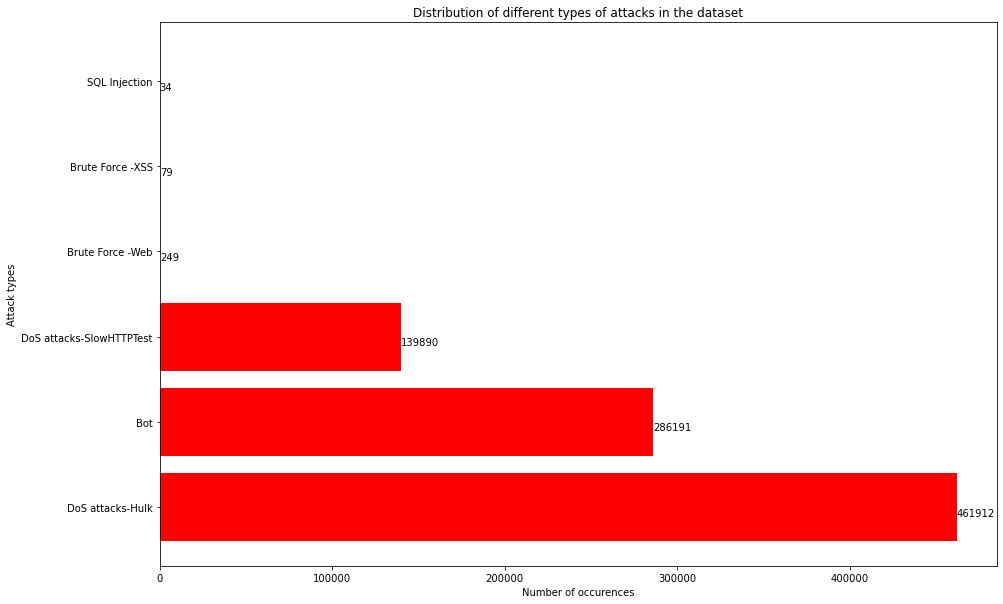

In [30]:
plt.figure(figsize=(15,10))

attack = ('DoS attacks-Hulk', 'Bot', 'DoS attacks-SlowHTTPTest' , 'Brute Force -Web' , 'Brute Force -XSS' , 'SQL Injection')
y_pos = np.arange(len(attack)) 
amount = df['label'].value_counts()[:]
plt.barh(y_pos, amount, align='center' , color='#FF0000')
# color='#FF0000'
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurences')
plt.ylabel('Attack types')
for i, v in enumerate(amount):
    plt.text(v + 3, i-0.1 , str(v))
    
plt.show()

In [31]:
# 3 Different labeling options
attacks = ['label', 'label_cat']

# xs=feature vectors, ys=labels
x = df.drop(attacks, axis=1)
y = df['label_cat']

In [32]:
x = x.drop(columns=['timestamp', 'dst_port'])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

In [34]:
column_names = np.array(list(x_train))
to_drop = []
for x in column_names:
    size = x_train.groupby([x]).size()
    # check for columns that only take one value
    if (len(size.unique()) == 1):
        to_drop.append(x)
to_drop

['bwd_pkt_len_min',
 'bwd_psh_flags',
 'fwd_urg_flags',
 'bwd_urg_flags',
 'pkt_len_min',
 'cwe_flag_count',
 'fwd_byts_b_avg',
 'fwd_pkts_b_avg',
 'fwd_blk_rate_avg',
 'bwd_byts_b_avg',
 'bwd_pkts_b_avg',
 'bwd_blk_rate_avg']

In [35]:
x_train = x_train.drop(to_drop, axis=1)
x_test = x_test.drop(to_drop, axis=1)
df_copy = df.drop(to_drop, axis=1)

In [36]:
# Normalise
min_max_scaler = MinMaxScaler().fit(x_train)

# Apply normalisation to dataset
x_train = min_max_scaler.transform(x_train)
x_test = min_max_scaler.transform(x_test)

# All values between 0 and 1
#pd.Series(x_train.flatten()).describe()

In [37]:
features = SelectKBest(score_func=chi2, k=x_train.shape[1])

#fit features to the training dataset
fit = features.fit(x_train, y_train)

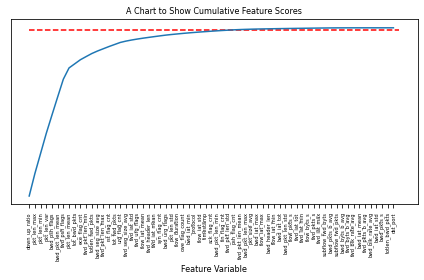

In [38]:
# sort the features by importance score
feature_importances = zip(df.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained 
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Feature Variable', fontsize=8)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=8)
#plt.figure(figsize=(500,200))
plt.tight_layout()

In [39]:
# perform selectkbest with k=40
features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(x_train, y_train)
x_train = fit.transform(x_train)
x_test = fit.transform(x_test)

In [40]:
new_features = df_copy.columns[features.get_support(indices=True)]

In [41]:
new_features

Index(['protocol', 'timestamp', 'flow_duration', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min',
       'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max',
       'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'flow_iat_std', 'flow_iat_max',
       'fwd_iat_std', 'fwd_iat_max', 'fwd_psh_flags', 'fwd_header_len',
       'bwd_header_len', 'fwd_pkts_s', 'bwd_pkts_s', 'pkt_len_max',
       'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt', 'psh_flag_cnt',
       'ack_flag_cnt', 'urg_flag_cnt', 'ece_flag_cnt', 'down_up_ratio',
       'pkt_size_avg', 'fwd_seg_size_avg', 'bwd_seg_size_avg',
       'subflow_fwd_pkts', 'subflow_fwd_byts', 'subflow_bwd_pkts',
       'subflow_bwd_byts', 'init_fwd_win_byts', 'init_bwd_win_byts'],
      dtype='object')

# 1- SVM

In [42]:
classifier = LinearSVC()

In [43]:
# fit the model
classifier.fit(x_train, y_train)


LinearSVC()

In [44]:
# predict validation
y_predicted = classifier.predict(x_test)


In [45]:
confusion_svm_1 = pd.crosstab(y_test, y_predicted)
confusion_svm_1

col_0,0,1,2,3,4,5
label_cat,,,,,,
0,57238,0,0,0,0,0
1,24,26,0,0,0,0
2,9,0,7,0,0,0
3,0,0,0,92382,0,0
4,0,0,0,0,27978,0
5,4,1,0,1,0,1


In [46]:
precision, recall, fscore, support = score(y_test, y_predicted)

d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}

In [47]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DoS attacks-Hulk,0.999354,1.000000,0.999677
1,Bot,0.962963,0.520000,0.675325
2,DoS attacks-SlowHTTPTest,1.000000,0.437500,0.608696
3,Brute Force -Web,0.999989,1.000000,0.999995
4,Brute Force -XSS,1.000000,1.000000,1.000000
5,SQL Injection,1.000000,0.142857,0.250000


# 2- Decision Tree

In [48]:
classifier1 = DecisionTreeClassifier()

In [49]:
# fit the model
classifier1.fit(x_train, y_train)


# predict validation
y_predicted = classifier1.predict(x_test)

confusion_dt_1 = pd.crosstab(y_test, y_predicted)
confusion_dt_1

col_0,0,1,2,3,4,5
label_cat,,,,,,
0,57237,0,1,0,0,0
1,2,47,0,0,0,1
2,1,0,14,0,0,1
3,0,0,0,92382,0,0
4,0,0,0,0,27978,0
5,0,2,0,0,0,5


In [50]:
precision, recall, fscore, support = score(y_test, y_predicted)

d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}

In [51]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DoS attacks-Hulk,0.999948,0.999983,0.999965
1,Bot,0.959184,0.940000,0.949495
2,DoS attacks-SlowHTTPTest,0.933333,0.875000,0.903226
3,Brute Force -Web,1.000000,1.000000,1.000000
4,Brute Force -XSS,1.000000,1.000000,1.000000
5,SQL Injection,0.714286,0.714286,0.714286


# 3- KNN

In [52]:
'''
p_list = []
r_list = []
f_list = []

# for odd values of k, 1-50 (note: takes a long time to run)
#k_range = range(1, 51, 2)

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = 3) #k
    # fit model
    classifier.fit(x_train, y_train)
    # predict validation
    y_predicted = classifier.predict(x_test)
    # calculate metrics
    precision, recall, fscore, n = score(y_test, y_predicted, average = 'macro')
    # append to the list
    p_list.append(precision)
    r_list.append(recall)
    f_list.append(fscore)
 '''  

"\np_list = []\nr_list = []\nf_list = []\n\n# for odd values of k, 1-50 (note: takes a long time to run)\n#k_range = range(1, 51, 2)\n\nfor k in k_range:\n    classifier = KNeighborsClassifier(n_neighbors = 3) #k\n    # fit model\n    classifier.fit(x_train, y_train)\n    # predict validation\n    y_predicted = classifier.predict(x_test)\n    # calculate metrics\n    precision, recall, fscore, n = score(y_test, y_predicted, average = 'macro')\n    # append to the list\n    p_list.append(precision)\n    r_list.append(recall)\n    f_list.append(fscore)\n "

In [53]:
'''
# plot results 
plt.plot(k_range, p_list, label='Precision')
plt.plot(k_range, r_list, label='Recall')

plt.plot(k_range, f1_list, label='F1 Score')
plt.legend(loc='best')
plt.xlabel('K Value')
plt.ylabel('%')
plt.title('A chart to show Precision, Recall, and F1 Score for different K Values')
plt.savefig('knn_k_values.png')
'''

"\n# plot results \nplt.plot(k_range, p_list, label='Precision')\nplt.plot(k_range, r_list, label='Recall')\n\nplt.plot(k_range, f1_list, label='F1 Score')\nplt.legend(loc='best')\nplt.xlabel('K Value')\nplt.ylabel('%')\nplt.title('A chart to show Precision, Recall, and F1 Score for different K Values')\nplt.savefig('knn_k_values.png')\n"

In [54]:
'''
# fit model
classifier = KNeighborsClassifier(n_neighbors = 3)

classifier.fit(x_train, y_train)
'''


'\n# fit model\nclassifier = KNeighborsClassifier(n_neighbors = 3)\n\nclassifier.fit(x_train, y_train)\n'

In [55]:
'''
#predict
y_predicted = classifier.predict(x_test)
'''

'\n#predict\ny_predicted = classifier.predict(x_test)\n'

In [56]:
'''
#calculate metrics
precision_knn_1, recall_knn_1, fscore_knn_1, n = score(y_test, y_predicted, average = 'macro')

accuracy_knn_1=  accuracy_score(y_test, y_predicted)
'''

"\n#calculate metrics\nprecision_knn_1, recall_knn_1, fscore_knn_1, n = score(y_test, y_predicted, average = 'macro')\n\naccuracy_knn_1=  accuracy_score(y_test, y_predicted)\n"

In [57]:
#confusion_knn_1 = pd.crosstab(y_test, y_predicted)

In [58]:
#confusion_knn_1

In [59]:
'''
precision, recall, fscore, support = score(y_test, y_predicted)
d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}

results = pd.DataFrame(data=d)
results
'''

"\nprecision, recall, fscore, support = score(y_test, y_predicted)\nd = {'attack': attack, 'precision': precision,\n     'recall' : recall, 'fscore': fscore}\n\nresults = pd.DataFrame(data=d)\nresults\n"

In [60]:
'''
print("Classification Report")
print(classification_report(y_test, y_predicted))
'''

'\nprint("Classification Report")\nprint(classification_report(y_test, y_predicted))\n'

In [61]:
'''
precision, recall, fscore, support = score(y_test, y_predicted)
d = {'attack': attack, 'precision': precision,
     'recall' : recall, 'fscore': fscore}

results = pd.DataFrame(data=d)
results
'''

"\nprecision, recall, fscore, support = score(y_test, y_predicted)\nd = {'attack': attack, 'precision': precision,\n     'recall' : recall, 'fscore': fscore}\n\nresults = pd.DataFrame(data=d)\nresults\n"

# 4- Naive Bayes

In [62]:
NB_cls = MultinomialNB()

In [63]:
# fit model
NB_cls.fit(x_train, y_train)


MultinomialNB()

In [64]:
# predict
y_predicted = NB_cls.predict(x_test)


In [65]:
confusion_nb_1 = pd.crosstab(y_test, y_test)
confusion_nb_1

label_cat,0,1,2,3,4,5
label_cat,,,,,,
0,57238,0,0,0,0,0
1,0,50,0,0,0,0
2,0,0,16,0,0,0
3,0,0,0,92382,0,0
4,0,0,0,0,27978,0
5,0,0,0,0,0,7


In [66]:
precision, recall, fscore, support = score(y_test, y_predicted)
d = {'attack': attack, 'precision': precision, 'recall' : recall, 'fscore': fscore}

In [67]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DoS attacks-Hulk,0.902810,0.500175,0.643717
1,Bot,1.000000,0.240000,0.387097
2,DoS attacks-SlowHTTPTest,1.000000,0.437500,0.608696
3,Brute Force -Web,0.757185,0.966844,0.849266
4,Brute Force -XSS,1.000000,1.000000,1.000000
5,SQL Injection,1.000000,0.142857,0.250000


# 5- K Means Clustering

In [68]:
colors = ['gray', 'turquoise', 'yellow', 'red', 
          'purple', 'black', 'blue', 'green',
         'orangered', 'pink', 'cyan', 'maroon']

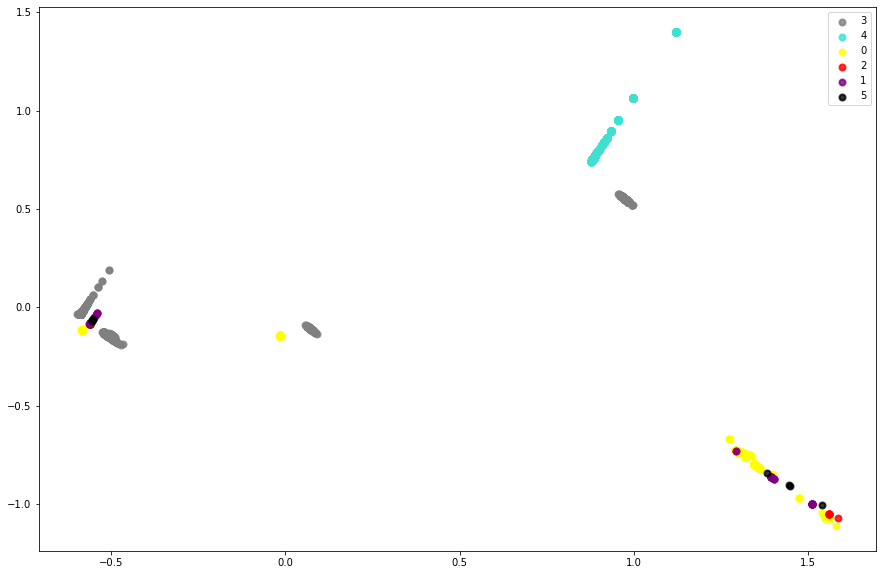

In [69]:
#Use PCA to remove dimensionality so we can visualise dataset in 2D
pca = PCA(n_components=40)
x_test_pca_cont = pca.fit_transform(x_test)

plt.figure(figsize=(15,10))
for color, l in zip(colors, y_test.unique()):
    plt.scatter(x_test_pca_cont[y_test == l, 0],
                x_test_pca_cont[y_test == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()

In [70]:
#fit
kmeans = KMeans(n_clusters = 12, random_state = 17).fit(x_train)
y_kmeans = kmeans.labels_

# predict
y_predicted = kmeans.predict(x_test)


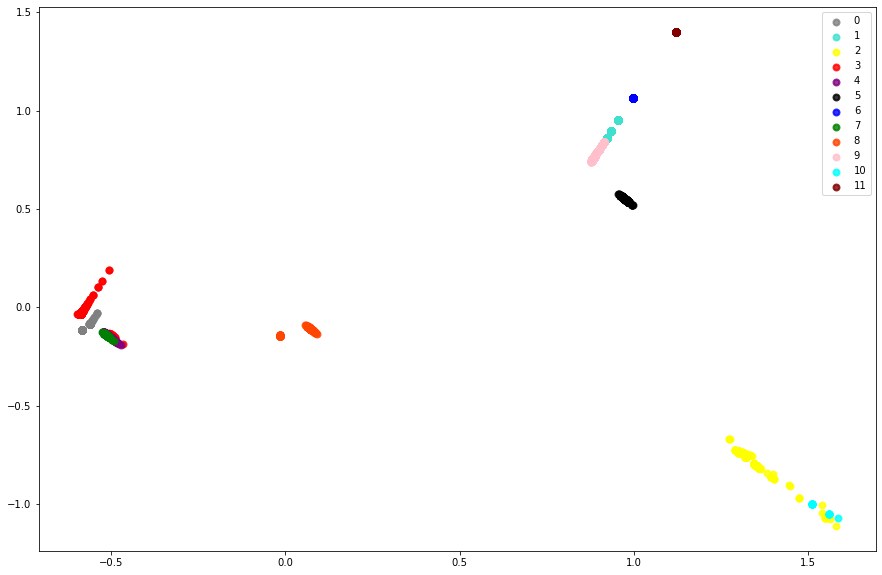

In [71]:
# plot pca graph
x_test_pca_cont = pca.fit_transform(x_test)

plt.figure(figsize=(15,10))
for color, l in zip(colors, np.unique(y_predicted)):
    plt.scatter(x_test_pca_cont[y_predicted == l, 0],
                x_test_pca_cont[y_predicted == l, 1],
               color = color, alpha=0.8, lw=2, label = l)
plt.legend(loc='best', shadow=False, scatterpoints=1)    
plt.show()


In [72]:
# cross tabulate to show actual groupings & clusters predicted
cluster_df = pd.DataFrame({'Predicted': y_predicted, 'Actual': y_test})
pd.crosstab(cluster_df.Actual, cluster_df.Predicted)

Predicted,0,1,2,3,4,5,6,7,8,9,10,11
Actual,,,,,,,,,,,,
0,28548,0,28629,0,0,0,0,0,61,0,0,0
1,23,0,15,0,0,0,0,0,0,0,12,0
2,8,0,1,0,0,0,0,0,0,0,7,0
3,0,0,0,87367,1743,2835,0,209,228,0,0,0
4,0,11711,0,0,0,0,12367,0,0,3697,0,203
5,3,0,4,0,0,0,0,0,0,0,0,0


# 6- Random Forest

In [73]:
forest =  RandomForestClassifier()

In [74]:
#fit
forest.fit(x_train, y_train)


RandomForestClassifier()

In [75]:
# predict
y_predicted = forest.predict(x_test)


In [76]:
confusion_rf_1 = pd.crosstab(y_test, y_predicted)
confusion_rf_1

col_0,0,1,2,3,4,5
label_cat,,,,,,
0,57237,1,0,0,0,0
1,6,44,0,0,0,0
2,1,0,14,0,0,1
3,0,0,0,92382,0,0
4,0,0,0,0,27978,0
5,0,2,0,0,0,5


In [77]:
precision, recall, fscore, support = score(y_test, y_predicted)
d = {'attack': attack, 'precision': precision, 
     'recall' : recall, 'fscore': fscore}

In [78]:
results = pd.DataFrame(data=d)
results

,attack,precision,recall,fscore
0,DoS attacks-Hulk,0.999878,0.999983,0.999930
1,Bot,0.936170,0.880000,0.907216
2,DoS attacks-SlowHTTPTest,1.000000,0.875000,0.933333
3,Brute Force -Web,1.000000,1.000000,1.000000
4,Brute Force -XSS,1.000000,1.000000,1.000000
5,SQL Injection,0.833333,0.714286,0.769231


# 7- GradientBoosting

In [80]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [81]:
'''
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))
    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(x_test, y_test)))
    '''

'\nlr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]\n\nfor learning_rate in lr_list:\n    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)\n    gb_clf.fit(x_train, y_train)\n\n    print("Learning rate: ", learning_rate)\n    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(x_train, y_train)))\n    print("Accuracy score (testing): {0:.3f}".format(gb_clf.score(x_test, y_test)))\n    '

In [82]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=0.1, 
                                     max_features=2,
                                     max_depth=2, 
                                     random_state=0)

gb_clf2.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, max_features=2, n_estimators=20,
                           random_state=0)

In [83]:
predictions = gb_clf2.predict(x_test)

In [85]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     57238
           1       0.43      0.54      0.48        50
           2       0.50      0.06      0.11        16
           3       0.99      1.00      1.00     92382
           4       1.00      1.00      1.00     27978
           5       0.08      0.29      0.12         7

    accuracy                           1.00    177671
   macro avg       0.67      0.65      0.62    177671
weighted avg       1.00      1.00      1.00    177671



# 8 - xgboost

In [86]:
#!pip install xgboost

In [87]:
import xgboost as xgb

In [88]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

E:\ProgramDATA\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [89]:
prediction = xgb_clf.predict(x_test)

In [90]:
score = xgb_clf.score(x_test, prediction)
print(score)

1.0


In [91]:
print("Classification Report")
print(classification_report(y_test, prediction))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.96      0.98      0.97        50
           2       1.00      0.88      0.93        16
           3       1.00      1.00      1.00     92382
           4       1.00      1.00      1.00     27978
           5       0.83      0.71      0.77         7

    accuracy                           1.00    177671
   macro avg       0.97      0.93      0.95    177671
weighted avg       1.00      1.00      1.00    177671



In [ ]:
# locate coulmns that have infinty values 
inf_col = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]


In [ ]:
inf_col

In [ ]:
for col in inf_col:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

In [ ]:
inf_col = [c for c in df.columns if df[df[c] == np.inf][c].count() > 0]
inf_col

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.values
numeric_cols

In [ ]:
    columns = [c for c in numeric_cols if df[df[c] < 0][c].count() > 0]
    for col in columns:
        mask = df[col] < 0
        df.loc[mask, col] = np.nan
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)

In [ ]:
columns

In [ ]:
df.shape

In [ ]:
df[::80]

In [ ]:
df.shape

In [ ]:
df["label"].value_counts()

In [ ]:
X = df.drop(columns=['label', 'label_cat'])
y = df[['label_cat']]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
stats = x.describe()
std = stats.loc['std']
features_no_variance = std[std == 0.0].index
pd.Series(features_no_variance).sort_values()

In [ ]:
x = x.drop(columns=features_no_variance)

In [ ]:
X.shape

In [ ]:
cluster_threshold = 1

corr = spearmanr(x).correlation
corr_linkage = hierarchy.ward(corr)
fig = plt.subplots(figsize=(25, 40))

sns.heatmap(corr, xticklabels=X.columns, yticklabels=X.columns, linewidths=.5, cmap=sns.diverging_palette(620, 10, as_cmap=True))

In [ ]:
cluster_ids = hierarchy.fcluster(corr_linkage, cluster_threshold, criterion='distance')
cluster_id_to_feature_ids = defaultdict(list)

for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

selected_features = X.columns[selected_features].tolist()

print('Selected features:')
pd.Series(selected_features)

In [ ]:
X = X[selected_features]

In [ ]:
[col for col in X.columns if X[col].isnull().sum()>0]

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)

In [ ]:
constArr=constant_filter.get_support()

In [ ]:
constArr  #True: Not a constant feature,False: Constant feature

In [ ]:
collections.Counter(constArr)

In [ ]:
#y.pop("label")

In [ ]:
#X.to_csv(r"E:\Benign.csv",index=False, header=True)

In [ ]:
#X.to_csv(r"E:\Multi.csv",index=False, header=True)

In [ ]:
#y.to_csv(r"E:\Multi_pred_Y.csv",index=False, header=True)

In [ ]:
#y.to_csv(r"E:\B_pred_Y.csv",index=False, header=True)